#Driver drowsiness detection using KNN

Importing Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing necessary libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
import os
import glob
import skimage
from skimage import io, color
from skimage.feature.texture import graycomatrix, graycoprops
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers, callbacks
import sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
from time import time
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import entropy
from time import sleep
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import drive

Defining train dataset

In [3]:
train_data=('/content/drive/MyDrive/Train_Drowsiness')

Defining the categories

In [4]:
categories = ['drowsy','non-drowsy']

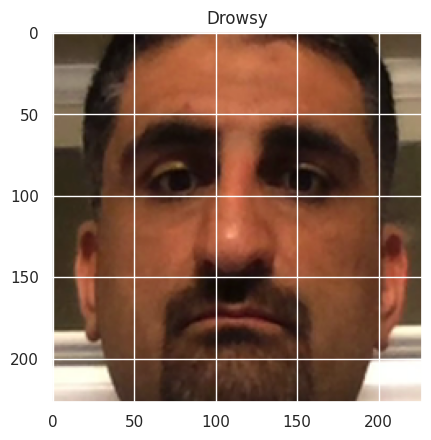

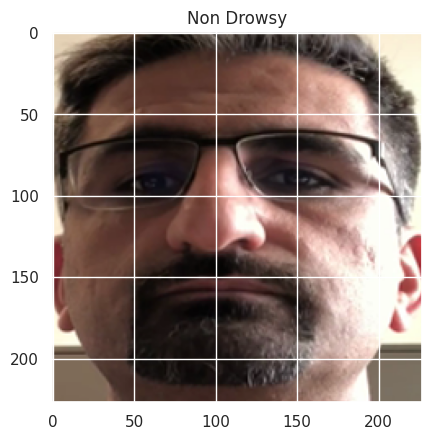

In [ ]:
path1 = '/content/drive/MyDrive/Train_Drowsiness/drowsy/A0006.png'
image = io.imread(path1)
figure, axis = plt.subplots()
axis.set_title('Drowsy')
axis.imshow(image)

path2= '/content/drive/MyDrive/Train_Drowsiness/non-drowsy/a0002.png'
image = io.imread(path2)
figure, axis = plt.subplots()
axis.set_title('Non Drowsy')
axis.imshow(image)

Feature extraction

In [5]:
from skimage.io import imread, imshow
from keras.preprocessing.image import ImageDataGenerator

featuresTrain = {}

featuresTrain['redMean'] = []
featuresTrain['blueMean'] = []
featuresTrain['greenMean'] = []

featuresTrain['redStd'] = []
featuresTrain['blueStd'] = []
featuresTrain['greenStd'] = []

featuresTrain['redSkew'] = []
featuresTrain['blueSkew'] = []
featuresTrain['greenSkew'] = []

featuresTrain['redKurt'] = []
featuresTrain['blueKurt'] = []
featuresTrain['greenKurt'] = []

featuresTrain['Entropy0'] = []

featuresTrain['Classes'] = []


for i in range(len(categories)):
  path = os.path.join(train_data,categories[i],'*')
  path = glob.glob(path)

  for p in path:
    featuresTrain['Classes'].append(i)
    image = io.imread(p)
    
    
    
    img_gs = cv2.imread(p,cv2.IMREAD_GRAYSCALE)
    img_gs = skimage.feature.graycomatrix(img_gs, [1], [np.pi/2])
    featuresTrain['Entropy0'].append(skimage.measure.shannon_entropy(np.reshape(img_gs,(256,256))))

    imgRed = image[:,:,0]
    featuresTrain['redMean'].append(np.mean(imgRed))
    featuresTrain['redStd'].append(np.std(imgRed))
    featuresTrain['redSkew'].append(np.mean(skew(imgRed)))
    featuresTrain['redKurt'].append(np.mean(kurtosis(imgRed)))

    imgBlue = image[:,:,1]
    featuresTrain['blueMean'].append(np.mean(imgBlue))
    featuresTrain['blueStd'].append(np.std(imgBlue))
    featuresTrain['blueSkew'].append(np.mean(skew(imgBlue)))
    featuresTrain['blueKurt'].append(np.mean(kurtosis(imgBlue)))

    imgGreen = image[:,:,2]
    featuresTrain['greenMean'].append(np.mean(imgGreen))
    featuresTrain['greenStd'].append(np.std(imgGreen))
    featuresTrain['greenSkew'].append(np.mean(skew(imgGreen)))
    featuresTrain['greenKurt'].append(np.mean(kurtosis(imgGreen)))



Creating train dataframe

In [6]:
train_dataFrame = pd.DataFrame.from_dict(featuresTrain)
from google.colab import files


In [7]:
train_dataFrame.to_csv('df', index = False)

In [8]:
df = pd.read_csv("/content/df")
df

redMean    blueMean   greenMean     redStd    blueStd   greenStd  \
0     131.412098  102.875895   89.736362  60.891464  60.973115  58.284924   
1     112.428885   79.669933   72.946554  75.149944  54.652683  45.801288   
2     130.995634  104.628908   92.081702  60.935711  62.169234  60.038991   
3     120.647674   84.976421   77.167071  74.719250  54.551085  45.765412   
4     123.584836   86.806167   79.529449  76.181560  55.622968  46.828499   
...          ...         ...         ...        ...        ...        ...   
3488  151.758583  117.515069  102.364358  51.732629  46.315595  43.295597   
3489  152.763842  117.590153  103.038231  48.985278  43.940380  41.154747   
3490  147.285761  113.529430   98.527412  53.856394  46.555795  43.403507   
3491  152.107221  116.123115  100.862058  49.282753  43.682765  40.790286   
3492  146.289158  113.205671   99.147839  54.673398  47.646968  44.629603   

       redSkew  blueSkew  greenSkew   redKurt  blueKurt  greenKurt  Entropy0  \
0    -0.589125 -0.440918  -0.262815  0.611043  0.512633   0.516771  0.866156   
1     0.076564  0.279786   0.347022 -0.572996 -0.203384   0.068771  1.008737   
2    -0.678127 -0.527175  -0.350405  0.102714 -0.122492  -0.253942  0.923232   
3    -0.062233  0.152402   0.214497 -0.617467 -0.330530  -0.112438  0.991259   
4    -0.161593  0.062306   0.130731 -0.859331 -0.436019  -0.214992  0.980507   
...        ...       ...        ...       ...       ...        ...       ...   
3488 -1.282786 -1.132359  -1.042573  0.990221  0.555603   0.558674  0.869047   
3489 -1.286493 -1.192425  -1.074932  1.113824  0.851657   0.725442  0.853737   
3490 -1.057019 -1.001223  -0.913703  0.486952  0.487284   0.438237  0.899523   
3491 -1.327353 -1.176951  -1.049181  1.181224  0.708807   0.624776  0.834961   
3492 -1.021129 -0.960285  -0.887211  0.384761  0.365984   0.345113  0.906306   

      Classes  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
3488        1  
3489        1  
3490        1  
3491        1  
3492        1  

[3493 rows x 14 columns]

Checking if there is any missing value in the dataset

In [9]:
df.isna().sum()/len(df)  #checking the percentage of missing values in each column

redMean      0.000000
blueMean     0.000000
greenMean    0.000000
redStd       0.000000
blueStd      0.000000
greenStd     0.000000
redSkew      0.002577
blueSkew     0.002577
greenSkew    0.000859
redKurt      0.002577
blueKurt     0.002577
greenKurt    0.000859
Entropy0     0.000000
Classes      0.000000
dtype: float64

Filling the missing values with zero

In [10]:
df = df.fillna(0)

Creating pairplot between features

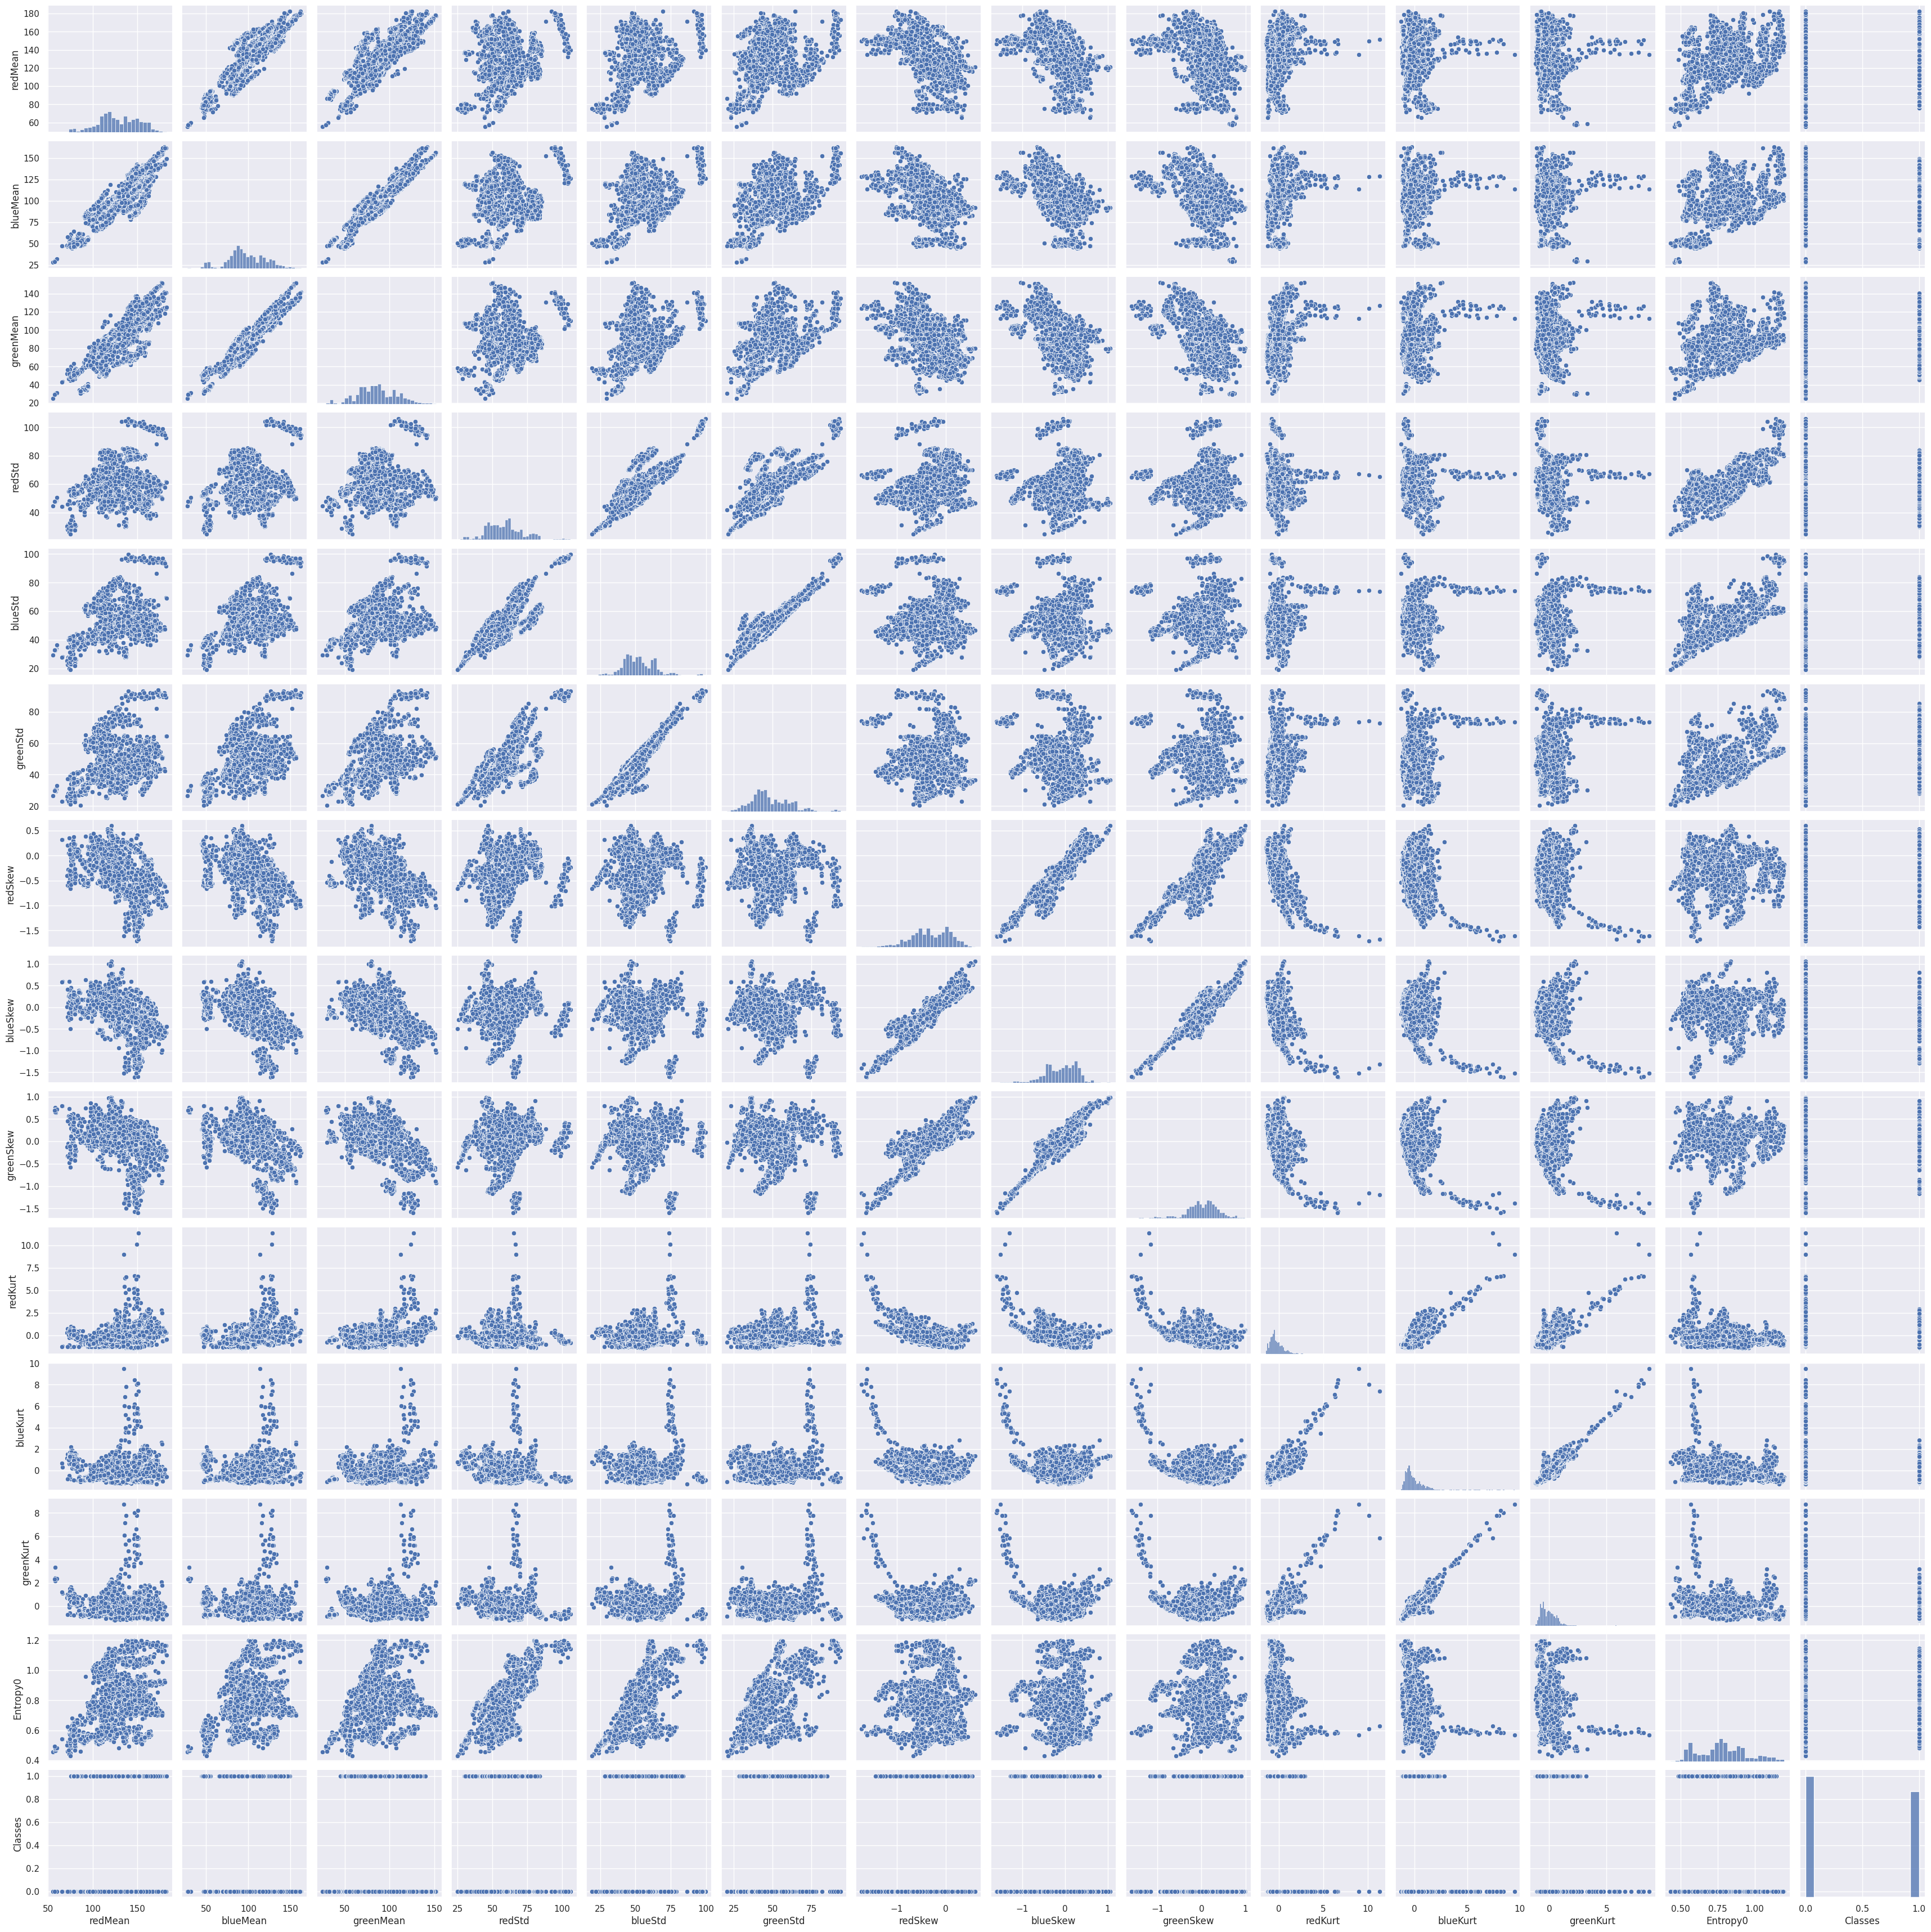

In [11]:
#Exploring dataset:
sns.pairplot(train_dataFrame, kind="scatter")
plt.show()

Creating boxplot between features

<AxesSubplot:xlabel='Classes', ylabel='Entropy0'>

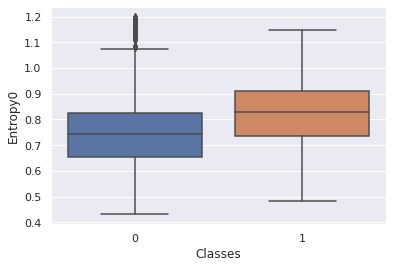

In [ ]:
sns.boxplot( x=df["Classes"], y=df["Entropy0"] )


<AxesSubplot:xlabel='Classes', ylabel='redMean'>

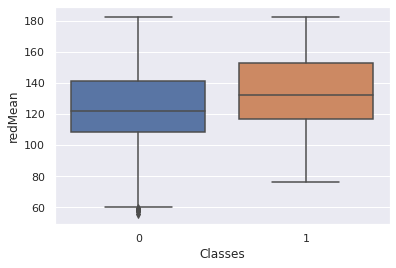

In [ ]:
sns.boxplot( x=df["Classes"], y=df["redMean"] )

<AxesSubplot:xlabel='Classes', ylabel='greenMean'>

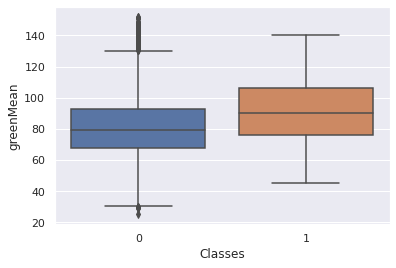

In [ ]:
sns.boxplot( x=df["Classes"], y=df["greenMean"] )

<AxesSubplot:xlabel='Classes', ylabel='blueMean'>

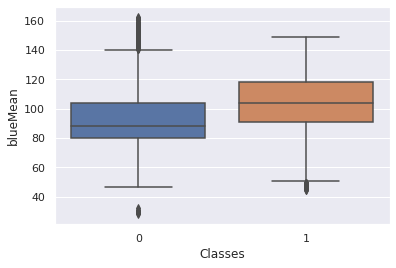

In [ ]:
sns.boxplot( x=df["Classes"], y=df["blueMean"] )

<AxesSubplot:xlabel='Classes', ylabel='redStd'>

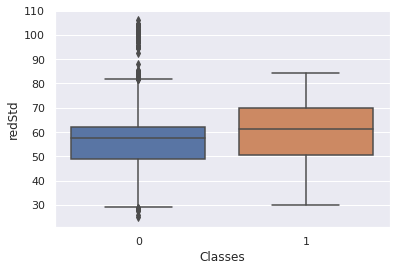

In [ ]:
sns.boxplot( x=df["Classes"], y=df["redStd"] )

<AxesSubplot:xlabel='Classes', ylabel='greenStd'>

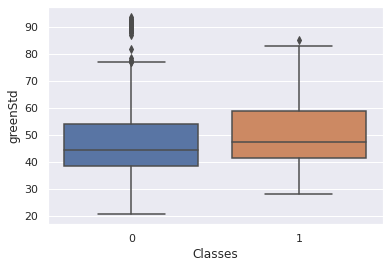

In [ ]:
sns.boxplot( x=df["Classes"], y=df["greenStd"])

<AxesSubplot:xlabel='Classes', ylabel='blueStd'>

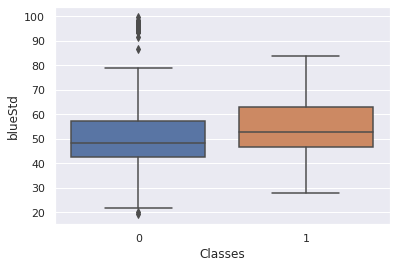

In [ ]:
sns.boxplot( x=df["Classes"], y=df["blueStd"])

<AxesSubplot:xlabel='Classes', ylabel='redKurt'>

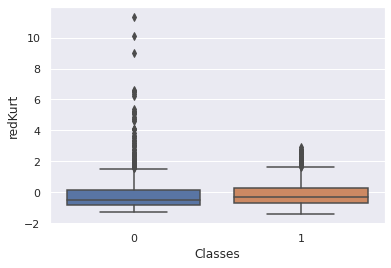

In [ ]:
sns.boxplot(x=df["Classes"],y=df["redKurt"])

Defing X and y

In [ ]:
X = df.drop('Classes', axis=1)

y = df['Classes']

Splitting test train dataset

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20)
import seaborn as sns
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

Creating the KNN model and training it 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
classifier1= KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2 )  
classifier1.fit(X_train, y_train) 
y_pred1 = classifier1.predict(X_val)
print("training set score: %f" % classifier1.score(X_train, y_train))
print("test set score: %f" % classifier1.score(X_val, y_val))

training set score: 0.985684
test set score: 0.982833


Defining test dataset

In [ ]:
test_data = ('/content/drive/MyDrive/Val_Data')

Feature extraction of test dataset

In [ ]:
featuresTest = {}

featuresTest['redMean'] = []
featuresTest['blueMean'] = []
featuresTest['greenMean'] = []

featuresTest['redStd'] = []
featuresTest['blueStd'] = []
featuresTest['greenStd'] = []

featuresTest['redSkew'] = []
featuresTest['blueSkew'] = []
featuresTest['greenSkew'] = []

featuresTest['redKurt'] = []
featuresTest['blueKurt'] = []
featuresTest['greenKurt'] = []

featuresTest['Entropy0'] = []

featuresTest['filename'] = []

for img in (os.listdir(test_data)):
  p = os.path.join(test_data,img)
  image = io.imread(p)
  
  img_gs = cv2.imread(p,cv2.IMREAD_GRAYSCALE)
  img_gs = skimage.feature.graycomatrix(img_gs, [1], [np.pi/2])
  
  featuresTest['Entropy0'].append(skimage.measure.shannon_entropy(np.reshape(img_gs,(256,256))))

  imgRed = image[:,:,0]
  featuresTest['redMean'].append(np.mean(imgRed))
  featuresTest['redStd'].append(np.std(imgRed))
  featuresTest['redSkew'].append(np.mean(skew(imgRed)))
  featuresTest['redKurt'].append(np.mean(kurtosis(imgRed)))

  imgBlue = image[:,:,1]
  featuresTest['blueMean'].append(np.mean(imgBlue))
  featuresTest['blueStd'].append(np.std(imgBlue))
  featuresTest['blueSkew'].append(np.mean(skew(imgBlue)))
  featuresTest['blueKurt'].append(np.mean(kurtosis(imgBlue)))

  imgGreen = image[:,:,2]
  featuresTest['greenMean'].append(np.mean(imgGreen))
  featuresTest['greenStd'].append(np.std(imgGreen))
  featuresTest['greenSkew'].append(np.mean(skew(imgGreen)))
  featuresTest['greenKurt'].append(np.mean(kurtosis(imgGreen)))

  featuresTest['filename'].append(img)

Defining test dataframe

In [ ]:
test_dataFrame = pd.DataFrame.from_dict(featuresTest)
test_dataFrame.to_csv('df_test', index = False)
df_test = pd.read_csv("/content/df_test")
df_test

redMean    blueMean   greenMean     redStd    blueStd   greenStd  \
0    99.935784   77.306701   75.807681  68.586542  67.473707  68.163187   
1   144.324497  109.523220  100.062373  52.264815  54.267410  51.301800   
2   125.424712   85.454560   61.644957  65.695856  50.991141  40.938567   
3   100.724776   78.663064   64.495352  50.668108  41.955875  35.792996   
4   155.545363  103.260203   81.476683  43.054839  43.978437  30.738342   
..         ...         ...         ...        ...        ...        ...   
95  154.648004  118.474335  103.350249  49.787342  44.329519  41.203775   
96  113.281725   73.580722   66.643832  69.262189  62.366783  57.919916   
97  160.783656  131.044441  114.021580  64.908041  52.466674  46.279196   
98  117.984746   95.702672   88.923693  69.636340  70.487120  65.642590   
99  116.293214   94.055367   84.862796  74.501097  73.286328  69.705073   

     redSkew  blueSkew  greenSkew   redKurt  blueKurt  greenKurt  Entropy0  \
0   0.121908  0.264280   0.249352 -0.217026 -0.013612   0.028906  0.968482   
1  -0.690451 -0.388255  -0.265980 -0.252370 -0.555816  -0.586401  0.810054   
2   0.072912  0.342752   0.563319 -1.054245 -1.012501  -0.622670  0.800759   
3   0.048022  0.156672   0.304281 -0.944333 -0.774874  -0.454704  0.789663   
4  -0.353497 -0.065145   0.044513 -0.094703  1.220828   0.900246  0.708961   
..       ...       ...        ...       ...       ...        ...       ...   
95 -1.378768 -1.213683  -1.110791  1.396813  0.822391   0.739330  0.824516   
96 -0.340664 -0.039570   0.057255 -0.690446 -0.499913  -0.126881  0.869370   
97 -0.293841 -0.220263  -0.136658 -0.067699 -0.308167  -0.446460  0.912897   
98 -0.227535  0.043672   0.062288 -0.128469 -0.110581  -0.242273  0.640735   
99 -0.075629  0.231757   0.280564 -0.415237  0.150935   0.411414  1.100493   

     filename  
0   C0244.png  
1   D0052.png  
2   G0431.png  
3   S0192.png  
4   J0317.png  
..        ...  
95  v0034.png  
96  y0216.png  
97  r0158.png  
98  o0480.png  
99  a1001.png  

[100 rows x 14 columns]

Defining X_test

In [ ]:
X_test = df_test.drop('filename', axis = 1)

In [ ]:
Y_test=classifier1.predict(X_test)

Making the prediction

In [ ]:
Y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Assigning prediction values with corresponding classes

In [ ]:
classes = []
for pred in Y_test:
  if(pred < 0.5): classes.append('drowsy')
  else: classes.append('non-drowsy')

In [ ]:
test_dataFrame['class'] = classes

Creating resultant dataframe

In [ ]:
res_dataframe = test_dataFrame[['filename','class']]

In [ ]:
res_dataframe

filename       class
0   C0244.png      drowsy
1   D0052.png      drowsy
2   G0431.png      drowsy
3   S0192.png      drowsy
4   J0317.png      drowsy
..        ...         ...
95  v0034.png  non-drowsy
96  y0216.png  non-drowsy
97  r0158.png  non-drowsy
98  o0480.png  non-drowsy
99  a1001.png  non-drowsy

[100 rows x 2 columns]